# Introduction
### In this small data set of salaries & experiences Im verifiying the prediction power of polynomial regression 


In [ ]:
#import libraries
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline 
from sklearn.metrics import mean_absolute_error


In [2]:
data=pd.read_csv('Position_Salaries.csv')  #reading the dataset

In [3]:
data.head()  #first 5 rows of the dataset 

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


### preprocessing 

In [4]:
x=data['Level'].values.reshape(-1,1) #determining x , y 
y=data['Salary']

In [5]:
x.shape,y.shape

((10, 1), (10,))

### Predictions with simple linear regression

In [7]:
from sklearn.linear_model import LinearRegression
basic_reg_model=LinearRegression()

In [39]:
basic_reg_model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
basic_reg_model_pred=basic_reg_model.predict(x)
basic_reg_model_pred

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

In [12]:
print('The Mean Absolute Error for basic_linear_model is {}'.format(mean_absolute_error(y,basic_reg_model_pred)))

The Mean Absolute Error for basic_linear_model is 128454.54545454546


In [40]:
print('The basic Linear model score is {}'.format(basic_reg_model.score(x,y)))

The basic Linear model score is 0.6690412331929895


### Predictions with Polynomial Regression


In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)

In [14]:
poly_x=poly_reg.fit_transform(x)

In [37]:
basic_reg_model.fit(poly_x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
poly_reg_2_pred=basic_reg_model.predict(poly_x)
poly_reg_2_pred

array([118727.27272727,  44151.51515151,   8439.39393939,  11590.90909091,
        53606.06060606, 134484.84848485, 254227.27272727, 412833.33333333,
       610303.03030303, 846636.36363636])

In [19]:
print('The Mean Absolute Error for poly_reg_2degree is {}'.format(mean_absolute_error(y,poly_reg_2_pred)))

The Mean Absolute Error for poly_reg_2degree is 70218.18181818188


In [38]:
print('The 2nd degree poly_model score is {}'.format(basic_reg_model.score(poly_x,y)))

The 2nd degree poly_model score is 0.9162082221443942


### predictions with polynomial regression 3rd degree

In [20]:
poly_reg_3rd=PolynomialFeatures(degree=3)

In [21]:
poly_x_3rd=poly_reg_3rd.fit_transform(x)

In [35]:
basic_reg_model.fit(poly_x_3rd,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
poly_reg_3_pred=basic_reg_model.predict(poly_x_3rd)
poly_reg_3_pred

array([ 14902.09790211,  78759.90675991,  94960.37296037,  88223.77622377,
        83270.3962704 , 104820.51282051, 177594.40559441, 326312.35431236,
       575694.63869464, 950461.53846153])

In [24]:
print('The Mean Absolute Error for poly_reg_3degree is {}'.format(mean_absolute_error(y,poly_reg_3_pred)))

The Mean Absolute Error for poly_reg_3degree is 34790.20979020935


In [36]:
print('The 3rd degree poly_model score is {}'.format(basic_reg_model.score(poly_x_3rd,y)))

The 3rd degree poly_model score is 0.9812097727913367


### predictions with polynomial regression 4th degree 

In [25]:
poly_reg_4th=PolynomialFeatures(degree=4)

In [26]:
poly_x_4th=poly_reg_4th.fit_transform(x)

In [27]:
basic_reg_model.fit(poly_x_4th,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
poly_reg_4th_pred=basic_reg_model.predict(poly_x_4th)
poly_reg_4th_pred

array([ 53356.64335681,  31759.90675996,  58642.19114221,  94632.86713289,
       121724.94172498, 143275.05827508, 184003.49650349, 289994.17249411,
       528694.63869452, 988916.08391594])

In [31]:
print('The Mean Absolute Error for poly_reg_4degree is {}'.format(mean_absolute_error(y,poly_reg_4th_pred)))

The Mean Absolute Error for poly_reg_4degree is 12681.81818184008


In [33]:
print('The 4th degree poly_model score is {}'.format(basic_reg_model.score(poly_x_4th,y)))

The 4th degree poly_model score is 0.9973922891706614


# Preparing for Comparisons

### Predictions Table 

In [41]:
predictions=pd.DataFrame()

In [48]:
predictions['Actual values']=y
predictions['Simple Linear Regression']=basic_reg_model_pred
predictions['Poly_2nd degree']=poly_reg_2_pred
predictions['Poly_3rd degree']=poly_reg_3_pred
predictions['Poly_4th degree']=poly_reg_4th_pred

In [49]:
predictions

,Simple Linear Regression,Poly_2nd degree,Poly_3rd degree,Poly_4th degree,Actual values
0,-114454.545455,118727.272727,14902.097902,53356.643357,45000
1,-33575.757576,44151.515152,78759.906760,31759.906760,50000
2,47303.030303,8439.393939,94960.372960,58642.191142,60000
3,128181.818182,11590.909091,88223.776224,94632.867133,80000
4,209060.606061,53606.060606,83270.396270,121724.941725,110000
5,289939.393939,134484.848485,104820.512821,143275.058275,150000
6,370818.181818,254227.272727,177594.405594,184003.496503,200000
7,451696.969697,412833.333333,326312.354312,289994.172494,300000
8,532575.757576,610303.030303,575694.638695,528694.638695,500000
9,613454.545455,846636.363636,950461.538462,988916.083916,1000000


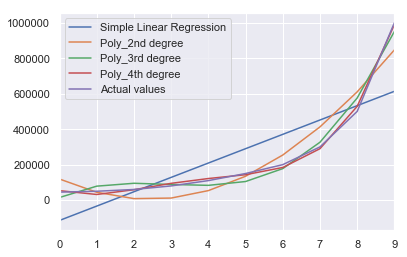

In [50]:
predictions.plot()

### Accuracies Table 

In [60]:
Accurracies=pd.DataFrame()
Accurracies['Linear Level']=['Simple Regression','Poly_2nd degree','Poly_3rd degree','Poly_4th degree']
Accurracies['Model Score']=[0.669,0.916,0.981,0.997]
Accurracies['Mean Absolute Error']=[128454.5450,70218.1818,34790.2097,12681.8180]

In [61]:
Accurracies

,Linear Level,Model Score,Mean Absolute Error
0,Simple Regression,0.669,128454.5450
1,Poly_2nd degree,0.916,70218.1818
2,Poly_3rd degree,0.981,34790.2097
3,Poly_4th degree,0.997,12681.8180


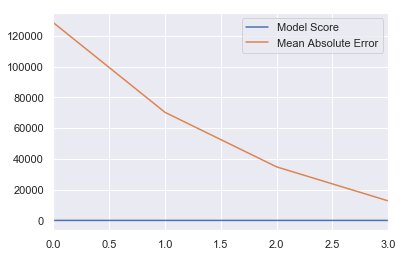

In [59]:
Accurracies.plot()

# Visualizations

In [63]:
predictions

,Simple Linear Regression,Poly_2nd degree,Poly_3rd degree,Poly_4th degree,Actual values
0,-114454.545455,118727.272727,14902.097902,53356.643357,45000
1,-33575.757576,44151.515152,78759.906760,31759.906760,50000
2,47303.030303,8439.393939,94960.372960,58642.191142,60000
3,128181.818182,11590.909091,88223.776224,94632.867133,80000
4,209060.606061,53606.060606,83270.396270,121724.941725,110000
5,289939.393939,134484.848485,104820.512821,143275.058275,150000
6,370818.181818,254227.272727,177594.405594,184003.496503,200000
7,451696.969697,412833.333333,326312.354312,289994.172494,300000
8,532575.757576,610303.030303,575694.638695,528694.638695,500000
9,613454.545455,846636.363636,950461.538462,988916.083916,1000000


In [65]:
Accurracies

,Linear Level,Model Score,Mean Absolute Error
0,Simple Regression,0.669,128454.5450
1,Poly_2nd degree,0.916,70218.1818
2,Poly_3rd degree,0.981,34790.2097
3,Poly_4th degree,0.997,12681.8180


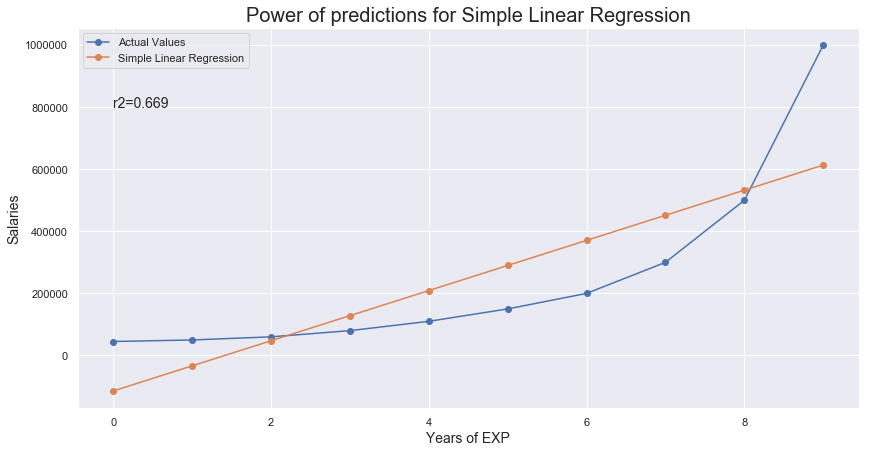

In [113]:
fig=plt.figure(figsize=(14,7))
plt.plot(predictions['Actual values'],marker='o',label='Actual Values')
plt.plot(predictions['Simple Linear Regression'],marker='o',label='Simple Linear Regression')
plt.legend()
plt.text(0,800000,'r2=0.669 ',fontsize=14)
plt.title('Power of predictions for Simple Linear Regression',fontsize=20)
plt.ylabel('Salaries',fontsize=14)
plt.xlabel('Years of EXP',fontsize=14)


plt.show()
fig.savefig('Simple Linear Regression.png',bbox_inches='tight')

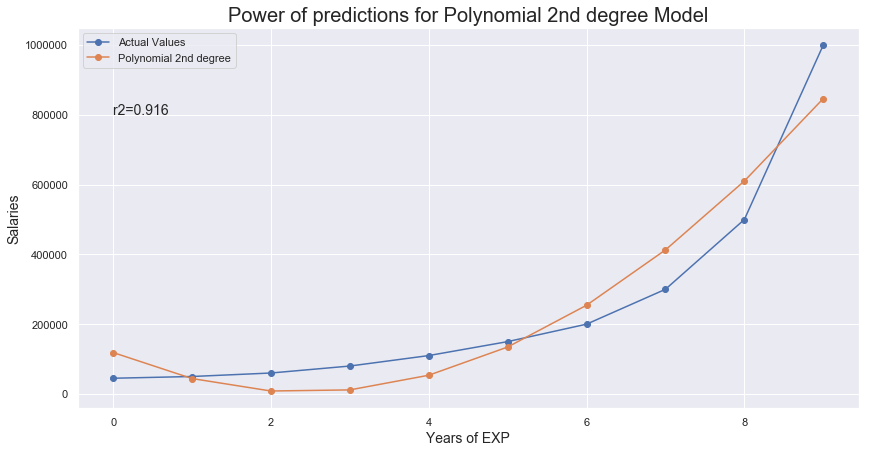

In [118]:
fig=plt.figure(figsize=(14,7))
plt.plot(predictions['Actual values'],marker='o',label='Actual Values')
plt.plot(predictions['Poly_2nd degree'],marker='o',label='Polynomial 2nd degree')
plt.legend()
plt.text(0,800000,'r2=0.916 ',fontsize=14)
plt.title('Power of predictions for Polynomial 2nd degree Model',fontsize=20)
plt.ylabel('Salaries',fontsize=14)
plt.xlabel('Years of EXP',fontsize=14)

plt.show()
fig.savefig('Polynomial Regression 2nd degree.png',bbox_inches='tight')

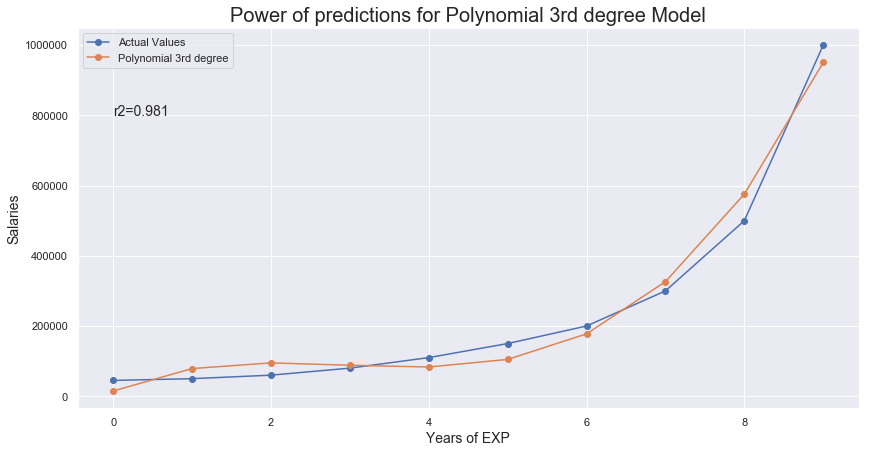

In [119]:
fig=plt.figure(figsize=(14,7))
plt.plot(predictions['Actual values'],marker='o',label='Actual Values')
plt.plot(predictions['Poly_3rd degree'],marker='o',label='Polynomial 3rd degree')
plt.legend()
plt.text(0,800000,'r2=0.981',fontsize=14)
plt.title('Power of predictions for Polynomial 3rd degree Model',fontsize=20)
plt.ylabel('Salaries',fontsize=14)
plt.xlabel('Years of EXP',fontsize=14)

plt.show()
fig.savefig('Polynomial Regression 3rd degree model.png',bbox_inches='tight')

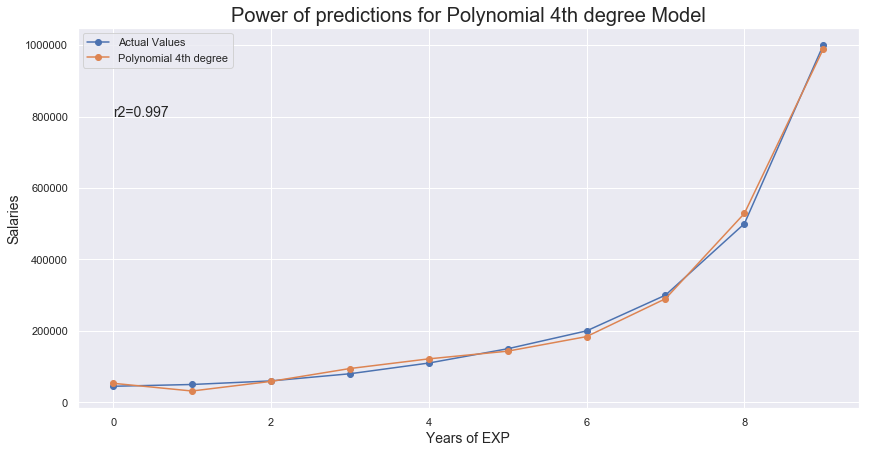

In [120]:
fig=plt.figure(figsize=(14,7))
plt.plot(predictions['Actual values'],marker='o',label='Actual Values')
plt.plot(predictions['Poly_4th degree'],marker='o',label='Polynomial 4th degree')
plt.legend()
plt.text(0,800000,'r2=0.997',fontsize=14)
plt.title('Power of predictions for Polynomial 4th degree Model',fontsize=20)
plt.ylabel('Salaries',fontsize=14)
plt.xlabel('Years of EXP',fontsize=14)

plt.show()
fig.savefig('Polynomial Regression 4th degree model.png',bbox_inches='tight')

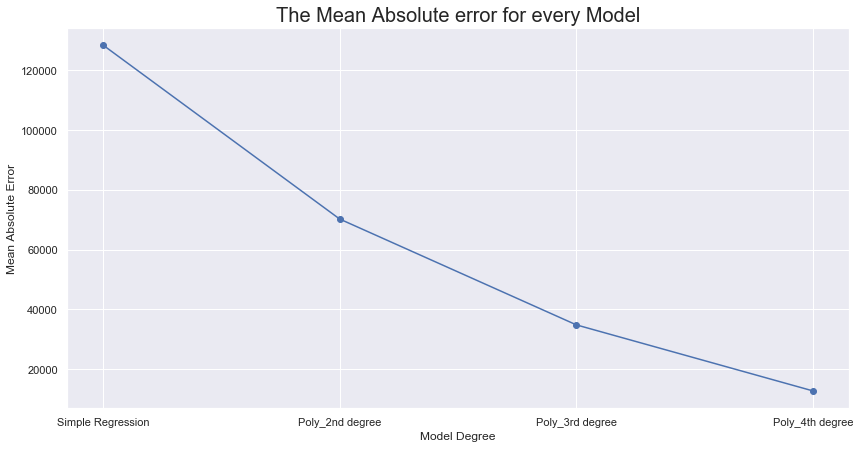

In [121]:
fig=plt.figure(figsize=(14,7))
plt.plot(Accurracies['Linear Level'],Accurracies['Mean Absolute Error'],marker='o')
plt.xlabel('Model Degree')
plt.ylabel('Mean Absolute Error')
plt.title('The Mean Absolute error for every Model',fontsize=20)
plt.show()
fig.savefig('Mean Absolute Error.png',bbox_inches='tight')